
Keras使得创建深度学习模型变得快速而简单。   

序贯(sequential)API允许您为大多数问题逐层堆叠创建模型。虽然说对很多的应用来说, 这样的一个手法很简单也解决 了很多深度学习网络结构的构建，但是它也有限制 - 它不允许你创建模型有共享层或有多个输入或输出的网络。     

Keras中的函数式(functional)API是创建网络模型的另一种方式，它提供了更多的灵活性，包括创建更复杂的模型。



In [18]:
import platform
import tensorflow as tf
import keras

print('Platfrom: {}'.format(platform.platform()))
print('tf version: {}'.format(tf.__version__))
print('keras version: {}'.format(keras.__version__))

Platfrom: Linux-4.14.79+-x86_64-with-Ubuntu-18.04-bionic
tf version: 1.14.0
keras version: 2.2.4


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

## 1. Sequential API   
Keras提供了一个Sequential模型API。它是创建深度学习模型的一种相对简单的方法，我们透过创建Kears的Sequential类别实例(instance), 然后创建模型图层 并添加到其中。     

```python
keras.layers.Dense(
                  units,  # 神经元数目 
				  activation=None,   
				  use_bias=True, 
				  kernel_initializer='glorot_uniform', 
				  bias_initializer='zeros', 
				  kernel_regularizer=None, 
				  bias_regularizer=None, 
			      activity_regularizer=None, 
				  kernel_constraint=None, 
				  bias_constraint=None  # 偏置值变化限制函数
)

```

In [0]:
from keras import Sequential
from keras.layers import Dense

In [21]:
model = Sequential([Dense(2, input_shape=(1,)), Dense(1)])
model

# 方法二：
# model = Sequential()
# model.add(Dense(2, input_shape=(1,)))
# model.add(Dense(1))

## 2. Keras函数式(functional)API    

为构建网络模型提供了更为灵活的方式。它允许您定义多个输入或输出模型以及共享图层的模型。除此之外，它允许您定义动态(ad-hoc)的非周期性(acyclic)网络图。   

模型是通过创建层的实例(layer instances)并将它们直接相互连接成对来定义的，然后定义一个模型(model)来指定那些层是要作为 这个模型的输入和输出。   
让我们依次看看Keras功能(functional)API的三个独特特性：

### 2.1 定义输入    
与Sequential模型不同，您必须创建独立的Input实例instance并定义输入数据张量的维度形状(tensor shape)。   
输入层采用一个张量形状参数(tensor shape)，它是一个tuple，用于宣吿输入张量的维度


In [22]:
from keras.layers import Input   

input = Input(shape=(784, ))
input

<tf.Tensor 'input_5_1:0' shape=(?, 784) dtype=float32>

### 2.2 连接不同的网络层    
这种逐层连接的方式赋予功能性(functional)API灵活性

In [23]:
input = Input(shape=(784,))
hidden = Dense(512)(input)
hidden

<tf.Tensor 'dense_8/BiasAdd:0' shape=(?, 512) dtype=float32>

### 2.3 创建模型   
在创建所有模型图层并将它们连接在一起之后，您必须定义一个模型(Model)物件的instance。  
与Sequential API一样，这个模型是您可以用于总结(summarize)，拟合(fit)，评估(evaluate)和预测(predict)。     

Keras提供了一个Model类别，您可以使用它从创建的图层创建模型的instance。它会要求您只指定整个模型的第一个输入层和最后一个的输出层


In [24]:
from keras.models import Model

input = Input(shape=(784, ))
hidden = Dense(512)(input)

model = Model(inputs=input, outputs=hidden)
model

## 3. 构建标准网络模型       

### 3.1 多层感知机/ Multilayer Perceptron     
该模型有784个输入，3个隐藏层，512,216和128个隐藏神经元，输出层有10个输出。    
在每个隐藏层中使用`relu`激活函数，并且在输出层中使用`softmax`激活函数进行多类别分类


In [25]:
from keras.utils import plot_model

mnist_input = Input(shape=(784,), name='input')
hidden1 = Dense(512, activation='relu', name='hidden1')(mnist_input)
hidden2 = Dense(216, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
output = Dense(10, activation='softmax', name='output')(hidden3)

model = Model(inputs=mnist_input, outputs=output)
# 网络结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 216)               110808    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               27776     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 541,794
Trainable params: 541,794
Non-trainable params: 0
_________________________________________________________________


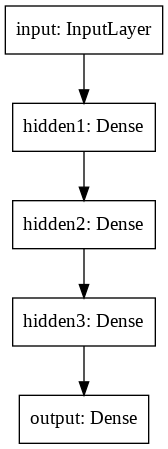

In [26]:
# 网络拓扑结构  
plot_model(model, to_file='perceptron_graph.png')
Image('perceptron_graph.png')

### 3.2 CNN    
```python
    Conv2D(filters,
           kernel_size, 
           strides=(1, 1),
           padding='valid', 
           data_format=None, 
           dilation_rate=(1, 1), 
           activation=None, 
           use_bias=True, 
           kernel_initializer='glorot_uniform', 
           bias_initializer='zeros', 
           kernel_regularizer=None, 
           bias_regularizer=None, 
           activity_regularizer=None, 
           kernel_constraint=None, 
           bias_constraint=None, 
           **kwargs)
```


In [27]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D

mnist_input = Input(shape=(28, 28, 1), name='input')

conv1 = Conv2D(128, 4, activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)
conv2 = Conv2D(64, 4, activation='relu', name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)

hidden1 = Dense(64, activation='relu', name='hidden1')(pool2)
output = Dense(10, activation='softmax', name='output')(hidden1)

model = Model(inputs=mnist_input, outputs=output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 128)       2176      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          131136    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
hidden1 (Dense)              (None, 4, 4, 64)          4160      
_________________________________________________________________
output (Dense)               (None, 4, 4, 10)          650       
Total para

### 3.3 RNN(略)

## 4. 共享层模型      

### 4.1 共享输入层（Shared Input Layer）
定义具有不同大小的内核的多个卷积层来解释图像输入。    

该模型使用28×28像素的灰阶图像。有两个CNN特征提取子模型共享这个输入;第一个具有4的内核大小和第二个8的内核大小。   
这些特征提取子模型的输出被平坦化(flatten)为向量(vector)，并且被串连成一个长向量, 然后被传递到完全连接的层以 用于在最终输出层之前进行10类别预测。


In [28]:
from keras.layers import Input, Dense, Flatten
from keras.layers.merge import concatenate

mnist_input = Input(shape=(28, 28, 1), name='input')

# first feature exractor
conv1 = Conv2D(32, 4, activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)
flat1 = Flatten()(pool1)

# second feature exractor
conv2 = Conv2D(16, 8, activation='relu', name='conv2')(mnist_input)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)
flat2 = Flatten()(pool2)

merge = concatenate([flat1, flat2])
hidden1 = Dense(64, activation='relu', name='hidden1')(merge)
output = Dense(10, activation='softmax', name='output')(hidden1)

model = Model(inputs=mnist_input, outputs=output)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 21, 21, 16)   1040        input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 12, 12, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool2 (Max

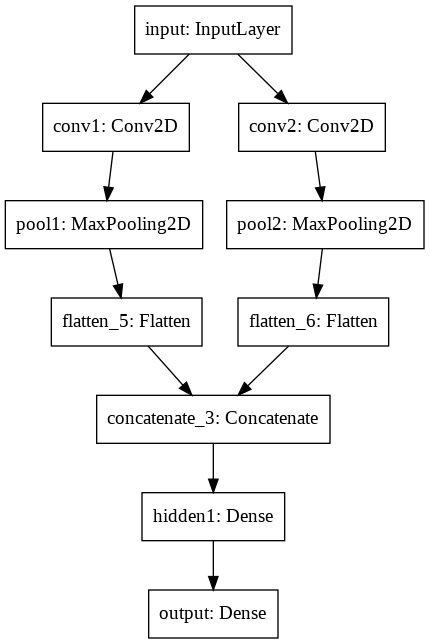

In [29]:
plot_model(model, to_file='shared_layer_input.png')
Image('shared_layer_input.png')

## 5. 多输入输出模型     

### 5.1 多输入模型     


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_gray_bigsize (InputLayer)   (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
img_rgb_smallsize (InputLayer)  (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 61, 61, 32)   544         img_gray_bigsize[0][0]           
__________________________________________________________________________________________________
conv21 (Conv2D)                 (None, 29, 29, 32)   1568        img_rgb_smallsize[0][0]          
__________________________________________________________________________________________________
pool11 (Ma

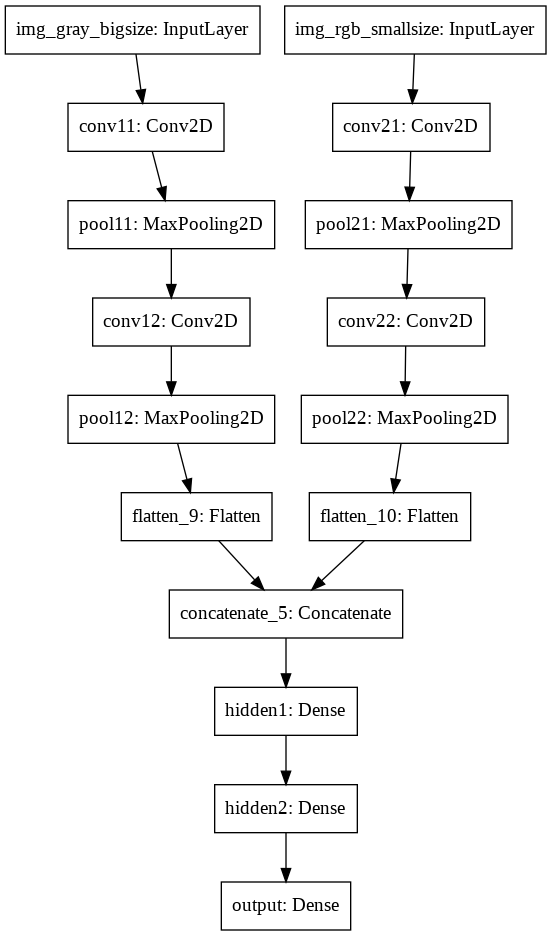

In [31]:
img_gray_bigsize = Input(shape=(64, 64, 1), name='img_gray_bigsize')
conv11 = Conv2D(32, kernel_size=4, activation='relu', name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2, 2), name='pool11')(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu', name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2, 2), name='pool12')(conv12)
flat1 = Flatten()(pool12)

img_rgb_smallsize = Input(shape=(32, 32, 3), name='img_rgb_smallsize')
conv21 = Conv2D(32, kernel_size=4, activation='relu', name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2, 2), name='pool21')(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu', name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2, 2), name='pool22')(conv22)
flat2 = Flatten()(pool22)

merge = concatenate([flat1, flat2])

hidden1 = Dense(128, activation='relu', name='hidden1')(merge)
hidden2 = Dense(64, activation='relu', name='hidden2')(hidden1)
output = Dense(10, activation='softmax', name='output')(hidden2)

model = Model(inputs=[img_gray_bigsize, img_rgb_smallsize], outputs=output)

model.summary()

plot_model(model, to_file='multiple_inputs.png')
Image('multiple_inputs.png')